# <center>Geometric Brownian Motion</center>

### <center>continuous time</center>

$$
\frac{dS_t}{S_t}
=
(r+\sigma\lambda)\,dt
+
\sigma\,dW_t
$$

### <center>discrete time</center>

$$
\frac{S_{t+dt}-S_t}{S_t}
=
(r + \sigma\lambda)\,dt
+
\sigma \sqrt{dt}\,\xi_t
$$

<center>which can be simplied to</center>

$$ \frac{S_{t+dt}-S_t}{S_t}
=
\mu dt
+
\sigma\sqrt{dt}\xi_t
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
def gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_p_1 = np.random.normal(loc=(1+mu)**dt, scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_p_1 = pd.concat([pd.DataFrame(np.ones((1, n_scenarios))), pd.DataFrame(rets_p_1)], ignore_index=True)
    return s_0*rets_p_1.cumprod()

<Axes: >

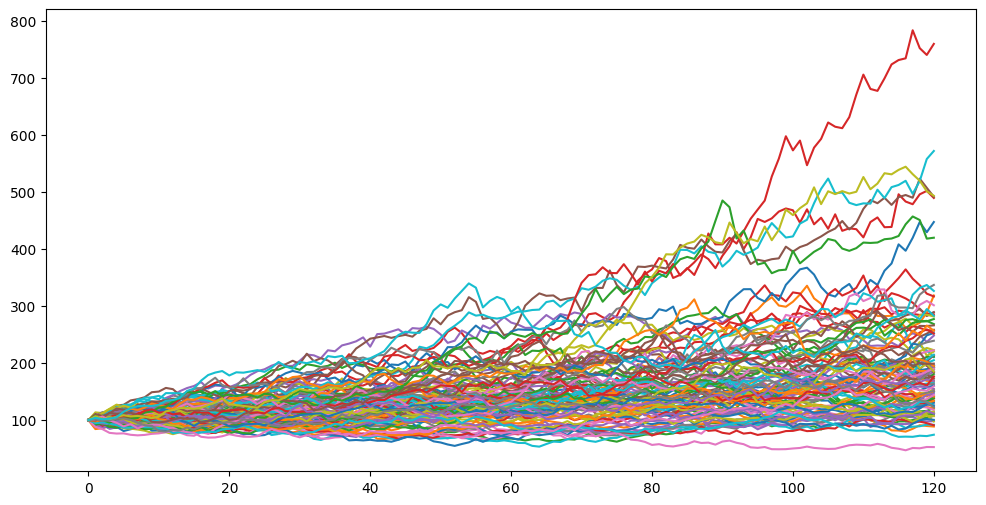

In [3]:
gbm().plot(legend=False, figsize=(12, 6))

In [4]:
def interactive_gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, s_0=100):
    prices = gbm(n_years=n_years, n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    terminal_wealth = prices.iloc[-1]
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[2,1]}, figsize=(24, 10))
    plt.subplots_adjust(wspace=0)

    prices.plot(ax=wealth_ax, legend=False, color='skyblue')
    wealth_ax.axhline(y=s_0, ls="--", color='black')
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='white', color='skyblue', orientation='horizontal')

In [5]:
widgets.interactive(interactive_gbm, n_years=(1, 30), n_scenarios=(1, 1000), mu=(-0.1, .1, 0.01), sigma=(0, 0.3, 0.01), s_0=(100, 1000, 100))

interactive(children=(IntSlider(value=10, description='n_years', max=30, min=1), IntSlider(value=100, descript…